# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgoc_fanin_1000.csv'
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
selected_individuals = 10
min_parameter_values = numpy.array([2.4e-10,1.0])
max_parameter_values = numpy.array([3.0e-9,2.0])
labels = ['MF-GoC Max Weight (nS)', 'MF-GoC LTD/LTP ratio']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 4 columns and 1958 rows
Hall of fame:
1 . Parameters: [9.74043313e-11 1.39346838e+00] Features: [0.56189342 0.03557   ]
2 . Parameters: [9.52615689e-11 1.43715183e+00] Features: [0.56013093 0.03509519]
3 . Parameters: [8.90615027e-11 1.43531104e+00] Features: [0.56011261 0.02515604]
4 . Parameters: [9.13624617e-11 1.43499996e+00] Features: [0.56008931 0.02171867]
5 . Parameters: [8.90615027e-11 1.43715183e+00] Features: [0.55823068 0.03463196]
6 . Parameters: [8.90615027e-11 1.43715183e+00] Features: [0.55823068 0.03463196]
7 . Parameters: [8.90615027e-11 1.43715183e+00] Features: [0.55823068 0.03463196]
8 . Parameters: [9.61198706e-11 1.40648400e+00] Features: [0.55684232 0.03649104]
9 . Parameters: [9.22433135e-11 1.43715183e+00] Features: [0.55673009 0.03103555]
10 . Parameters: [9.19878924e-11 1.43645383e+00] Features: [0.55649496 0.02363024]


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


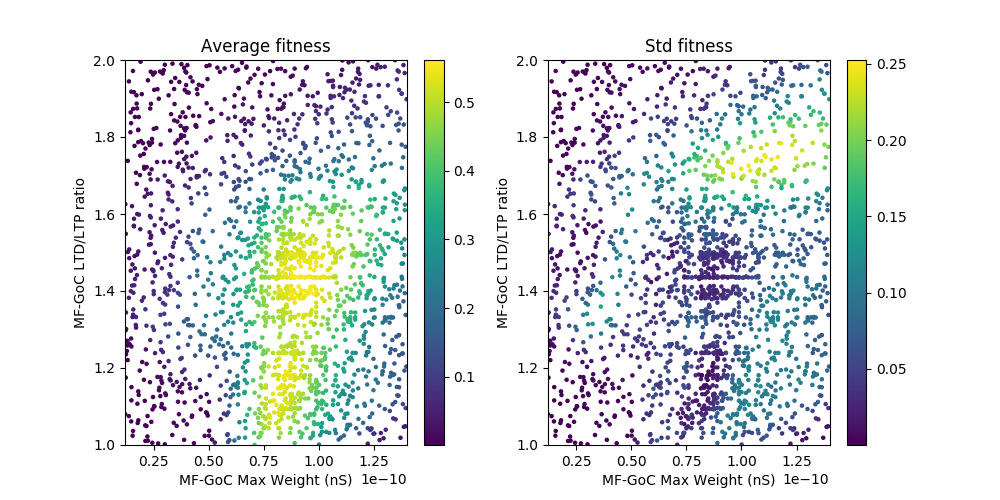

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


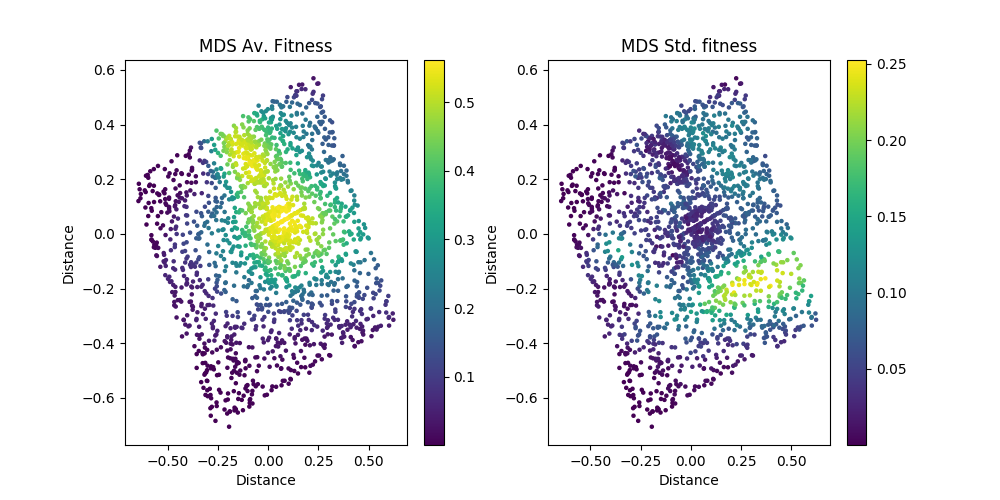

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=10000, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()